In [1]:
#1
import pandas as pd
import numpy as np
df = pd.read_csv('Telco-midterm.csv')
print(df.columns)
print(df.shape)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')
(3087, 15)


In [2]:
#2
print(df.Churn.isnull().sum())
print(sum(df["Churn"].isna()))
print(len(df[df['Churn'].isna()]))
df[df['Churn'].isna()]

4
4
4


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
16,17,Male,0,1,1,43,1,1,No,Two year,0,Mailed check,24.25,1077.95,NaN
17,18,Male,0,0,0,7,1,1,Fiber optic,Month-to-month,1,Electronic check,99.80,673.25,NaN
112,113,Female,0,1,1,72,1,1,Fiber optic,Two year,1,Bank transfer (automatic),110.45,8058.85,NaN
113,114,Female,0,1,1,21,1,0,Fiber optic,Month-to-month,1,Electronic check,102.80,2110.15,NaN


In [3]:
#3
df = df.dropna()
print(df.shape)

(3083, 15)


In [4]:
df.Churn.value_counts()

0.0    2253
1.0     830
Name: Churn, dtype: int64

In [5]:
#4
df.tenure.mean()

32.108336036328254

In [6]:
df.tenure.median()

29.0

In [7]:
df[['tenure']].agg([np.mean,np.median])

,tenure
mean,32.108336
median,29.000000


In [8]:
#5
df.gender.value_counts()

Male      1551
Female    1532
Name: gender, dtype: int64

In [9]:
#6
#import matplotlib.pylab as plt
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(df.TotalCharges)
plt.show()

<Figure size 640x480 with 1 Axes>

In [10]:
#7
df.Churn = df.Churn.astype('category')
df.dtypes

customerID             int64
gender                object
SeniorCitizen          int64
Partner                int64
Dependents             int64
tenure                 int64
PhoneService           int64
MultipleLines          int64
InternetService       object
Contract              object
PaperlessBilling       int64
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [11]:
#8
df[df.SeniorCitizen == 1].TotalCharges.mean()/df[df.SeniorCitizen == 0].TotalCharges.mean()

1.2180559535838644

<AxesSubplot:xlabel='Contract', ylabel='MonthlyCharges'>

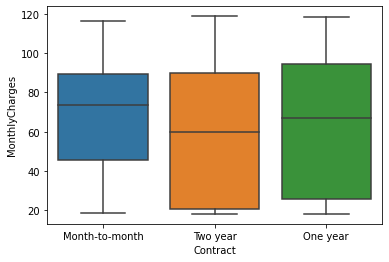

In [12]:
#9
import seaborn as sns
sns.boxplot(x = 'Contract', y = 'MonthlyCharges', data = df)

In [13]:
#10
df = pd.get_dummies(data=df, drop_first = True, columns=['gender', 'InternetService', 'PaymentMethod','Contract']) 

In [14]:
#11 predictors and outcome
excludeColumns = ('customerID', 'Churn')
predictors = [s for s in df.columns if s not in excludeColumns]
outcome = 'Churn'

In [106]:
#12
from sklearn.model_selection import train_test_split
X = df[predictors]
y = df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)


In [16]:
#12
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree
dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
dt.fit(train_X, train_y)

no display found. Using non-interactive Agg backend


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

/Users/acast/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


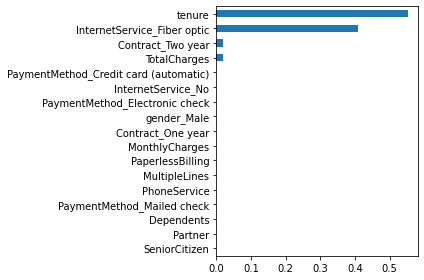

In [17]:
var_imp = pd.DataFrame({'feature': train_X.columns, 'importance': dt.feature_importances_}).sort_values('importance',ascending=True)
var_imp

ax = var_imp.plot(kind='barh', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [18]:
print(pd.DataFrame(list(zip(valid_X.columns,dt.feature_importances_))).sort_values(1, ascending=False))

                                        0         1
3                                  tenure  0.553121
10            InternetService_Fiber optic  0.408325
16                      Contract_Two year  0.020187
8                            TotalCharges  0.018366
4                            PhoneService  0.000000
5                           MultipleLines  0.000000
6                        PaperlessBilling  0.000000
7                          MonthlyCharges  0.000000
1                                 Partner  0.000000
9                             gender_Male  0.000000
2                              Dependents  0.000000
11                     InternetService_No  0.000000
12  PaymentMethod_Credit card (automatic)  0.000000
13         PaymentMethod_Electronic check  0.000000
14             PaymentMethod_Mailed check  0.000000
15                      Contract_One year  0.000000
0                           SeniorCitizen  0.000000


In [19]:
#13, #14, #15
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
print("precision score: ", precision_score(valid_y,dt.predict(valid_X)))
print("recall score: ", recall_score(valid_y,dt.predict(valid_X)))
print("f1-score: ", f1_score(valid_y,dt.predict(valid_X)))

precision score:  0.5944444444444444
recall score:  0.44214876033057854
f1-score:  0.5071090047393365


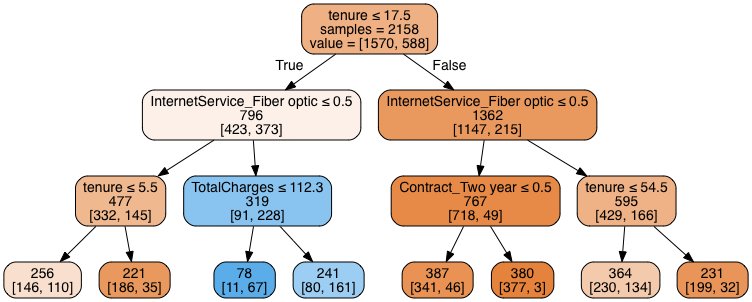

In [20]:
plotDecisionTree(dt, feature_names=train_X.columns)

## Logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 1, solver = 'liblinear')
lr.fit(train_X, train_y)

print('intercept ', lr.intercept_[0])
print(pd.DataFrame({'coeff': lr.coef_[0]}, index=train_X.columns))
print()

intercept  -0.25320832759653894
                                          coeff
SeniorCitizen                          0.298655
Partner                                0.104993
Dependents                            -0.187203
tenure                                -0.060468
PhoneService                          -0.281716
MultipleLines                          0.236601
PaperlessBilling                       0.250303
MonthlyCharges                         0.000833
TotalCharges                           0.000270
gender_Male                           -0.018235
InternetService_Fiber optic            0.807263
InternetService_No                    -0.554885
PaymentMethod_Credit card (automatic) -0.184150
PaymentMethod_Electronic check         0.389631
PaymentMethod_Mailed check            -0.083738
Contract_One year                     -0.392454
Contract_Two year                     -1.469110



In [22]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
print("precision score: ", precision_score(valid_y,lr.predict(valid_X)))
print("recall score: ", recall_score(valid_y,lr.predict(valid_X)))
print("f1-score: ", f1_score(valid_y,lr.predict(valid_X)))

precision score:  0.6045454545454545
recall score:  0.5495867768595041
f1-score:  0.5757575757575757


# K-NN Classifier

In [23]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)

In [25]:
knn.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [49]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(train_X, train_y)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_X, train_y)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(valid_X, valid_y) 

In [50]:
train_accuracy

array([0.99907322, 0.85403151, 0.85264133, 0.82066728, 0.82113068,
       0.82113068, 0.82113068, 0.80491196])

In [51]:
test_accuracy

array([0.70810811, 0.74810811, 0.74162162, 0.75243243, 0.75135135,
       0.76324324, 0.76324324, 0.77081081])

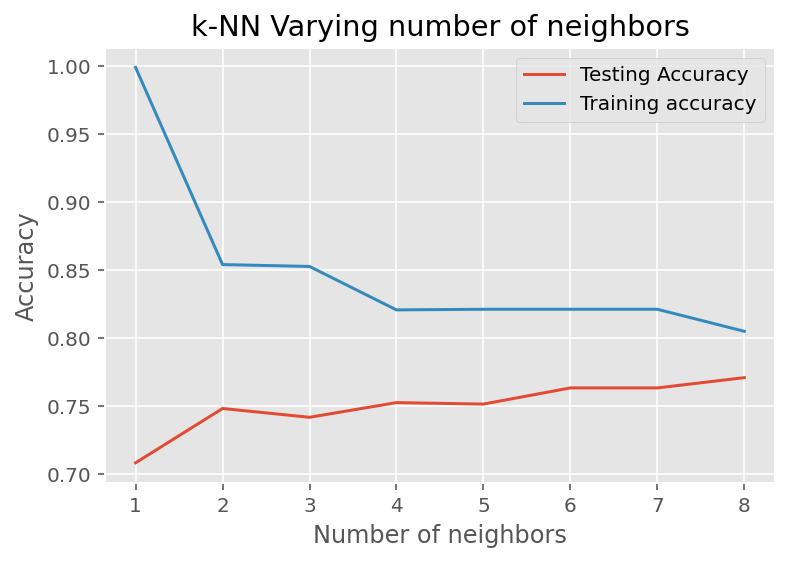

In [56]:
#Generate plot
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

# Unsupervised learning to create new features

In [107]:
from sklearn.preprocessing import MinMaxScaler

cols = X.columns
X = MinMaxScaler().fit_transform(X)

In [108]:
X = pd.DataFrame(X, columns=[cols])
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
0,0.0,0.0,0.0,0.028169,1.0,0.0,0.0,0.015920,0.005189,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.943662,1.0,1.0,0.0,0.915423,0.839015,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.338028,1.0,0.0,1.0,0.717910,0.249578,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.323944,1.0,1.0,1.0,0.399005,0.153468,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.676056,1.0,1.0,0.0,0.828856,0.583751,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [115]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=1) 
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [116]:
X = pd.concat((X,pd.Series(kmeans.labels_).rename('Cluster').to_frame()), axis=1)

In [117]:
X.head()

,"(SeniorCitizen,)","(Partner,)","(Dependents,)","(tenure,)","(PhoneService,)","(MultipleLines,)","(PaperlessBilling,)","(MonthlyCharges,)","(TotalCharges,)","(gender_Male,)","(InternetService_Fiber optic,)","(InternetService_No,)","(PaymentMethod_Credit card (automatic),)","(PaymentMethod_Electronic check,)","(PaymentMethod_Mailed check,)","(Contract_One year,)","(Contract_Two year,)",Cluster,Cluster
0,0.0,0.0,0.0,0.028169,1.0,0.0,0.0,0.015920,0.005189,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2,1
1,0.0,0.0,0.0,0.943662,1.0,1.0,0.0,0.915423,0.839015,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
2,0.0,1.0,1.0,0.338028,1.0,0.0,1.0,0.717910,0.249578,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4,1
3,0.0,1.0,0.0,0.323944,1.0,1.0,1.0,0.399005,0.153468,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3,1
4,1.0,0.0,0.0,0.676056,1.0,1.0,0.0,0.828856,0.583751,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0


In [118]:
y = df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [119]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 1, solver = 'liblinear')
lr.fit(train_X, train_y)

print('intercept ', lr.intercept_[0])
print(pd.DataFrame({'coeff': lr.coef_[0]}, index=train_X.columns))
print()

intercept  -0.4545193242442448
                                             coeff
(SeniorCitizen,)                          0.286534
(Partner,)                                0.075194
(Dependents,)                            -0.213652
(tenure,)                                -2.623140
(PhoneService,)                          -0.251951
(MultipleLines,)                          0.237567
(PaperlessBilling,)                       0.232689
(MonthlyCharges,)                         0.360513
(TotalCharges,)                           0.250390
(gender_Male,)                           -0.039760
(InternetService_Fiber optic,)            0.831653
(InternetService_No,)                    -0.586748
(PaymentMethod_Credit card (automatic),) -0.191756
(PaymentMethod_Electronic check,)         0.411315
(PaymentMethod_Mailed check,)            -0.084860
(Contract_One year,)                     -0.485981
(Contract_Two year,)                     -1.689156
Cluster                                  -0.039462


In [120]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
print("precision score: ", precision_score(valid_y,lr.predict(valid_X)))
print("recall score: ", recall_score(valid_y,lr.predict(valid_X)))
print("f1-score: ", f1_score(valid_y,lr.predict(valid_X)))

precision score:  0.5972850678733032
recall score:  0.5454545454545454
f1-score:  0.570194384449244


In [ ]:
#

#20
26.54

#21
C

#22
Model A is better, lower number of FN

#23
2/3 = 67%

#24
C

#25
C

#26
A - higher AUC

#27
B

#28
3 or C

#29
Eliminate - C

#30
C